In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pwd; ls -ll;

/content
total 4
drwxr-xr-x 1 root root 4096 Oct  1 16:28 sample_data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crimes_-_2020.csv to Crimes_-_2020 (1).csv


In [ ]:
import io
DataFrame = pd.read_csv(io.BytesIO(uploaded['Crimes_-_2020.csv']))
DataFrame

ID Case Number  ...  Longitude                       Location
0       12157684    JD358233  ... -87.655101   (41.671461741, -87.65510074)
1       12158021    JD358730  ... -87.718974  (41.931885873, -87.718974049)
2       12158278    JD358923  ... -87.792209  (41.942567168, -87.792208683)
3       12158889    JD359283  ... -87.657619  (41.968052927, -87.657619242)
4       12159507    JD358752  ... -87.683229  (41.764151886, -87.683229302)
...          ...         ...  ...        ...                            ...
143114  11940534    JD100083  ... -87.699510  (41.779907312, -87.699510196)
143115  11938186    JD100178  ... -87.763346  (41.884839745, -87.763346491)
143116  11938654    JD100726  ... -87.655103   (41.980639456, -87.65510293)
143117  11938353    JD100252  ... -87.628291  (41.770172698, -87.628291299)
143118  11939683    JD101917  ... -87.667141  (41.912458603, -87.667140971)

[143119 rows x 22 columns]

Based on link below, we shall use FBI code instead of IUCR .
http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html#N04A
For example :

> **FBI code** - Homicide 1st & 2nd Degree - 01A

> **IUCR** 
*  0110 HOMICIDE FIRST DEGREE MURDER
*  0130 HOMICIDE SECOND DEGREE MURDER

> **FBI code** - Nonvoluntary Manslaughter - 01B

> **IUCR** 
*    0141 HOMICIDE INVOLUNTARY MANSLAUGHTER
*    0142 HOMICIDE RECKLESS HOMICIDE

**dt0 - Seasons numeric**

*   4- Fall   - Lowest crime rate
*   3- Summer - Highest crime rate

*   2- Spring
*   1- Winter

**dt1 - Weekday numeric**
 The day of the week with Monday=0, Sunday=6 
 
**dt2 - Weekday string** 

*  Sunday - Highest rate crimes
*  Tuesday - Lowest rate crimes


   
    


In [ ]:
dt0 = DataFrame.copy()
dt0["Arrest"] = dt0["Arrest"].astype(int)
dt0["Domestic"] = dt0["Domestic"].astype(int)
dt0["FBI Code"] = (DataFrame["FBI Code"]).apply(lambda x: int(x, 16))
dt0["Date"] = (pd.to_datetime(dt0['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.month%12 + 3)//3
dt0["Date"].value_counts()

3    55645
2    46505
1    37544
4     3425
Name: Date, dtype: int64

In [ ]:
dt1 = DataFrame.copy()
dt1["Arrest"] = dt1["Arrest"].astype(int)
dt1["Domestic"] = dt1["Domestic"].astype(int)
dt1["FBI Code"] = (DataFrame["FBI Code"]).apply(lambda x: int(x, 16))
dt1["Date"] = pd.to_datetime(dt1['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.dayofweek
dt1

ID Case Number  ...  Longitude                       Location
0       12157684    JD358233  ... -87.655101   (41.671461741, -87.65510074)
1       12158021    JD358730  ... -87.718974  (41.931885873, -87.718974049)
2       12158278    JD358923  ... -87.792209  (41.942567168, -87.792208683)
3       12158889    JD359283  ... -87.657619  (41.968052927, -87.657619242)
4       12159507    JD358752  ... -87.683229  (41.764151886, -87.683229302)
...          ...         ...  ...        ...                            ...
143114  11940534    JD100083  ... -87.699510  (41.779907312, -87.699510196)
143115  11938186    JD100178  ... -87.763346  (41.884839745, -87.763346491)
143116  11938654    JD100726  ... -87.655103   (41.980639456, -87.65510293)
143117  11938353    JD100252  ... -87.628291  (41.770172698, -87.628291299)
143118  11939683    JD101917  ... -87.667141  (41.912458603, -87.667140971)

[143119 rows x 22 columns]

In [ ]:
dt1["Date"].value_counts()

6    21486
5    21082
4    21019
0    20488
2    20324
3    19541
1    19179
Name: Date, dtype: int64

In [ ]:
codt1=dt1[dt1["Date"]==6]
codt1.head(3)

ID Case Number  ...  Longitude                       Location
0  12157684    JD358233  ... -87.655101   (41.671461741, -87.65510074)
1  12158021    JD358730  ... -87.718974  (41.931885873, -87.718974049)
2  12158278    JD358923  ... -87.792209  (41.942567168, -87.792208683)

[3 rows x 22 columns]

No handles with labels found to put in legend.


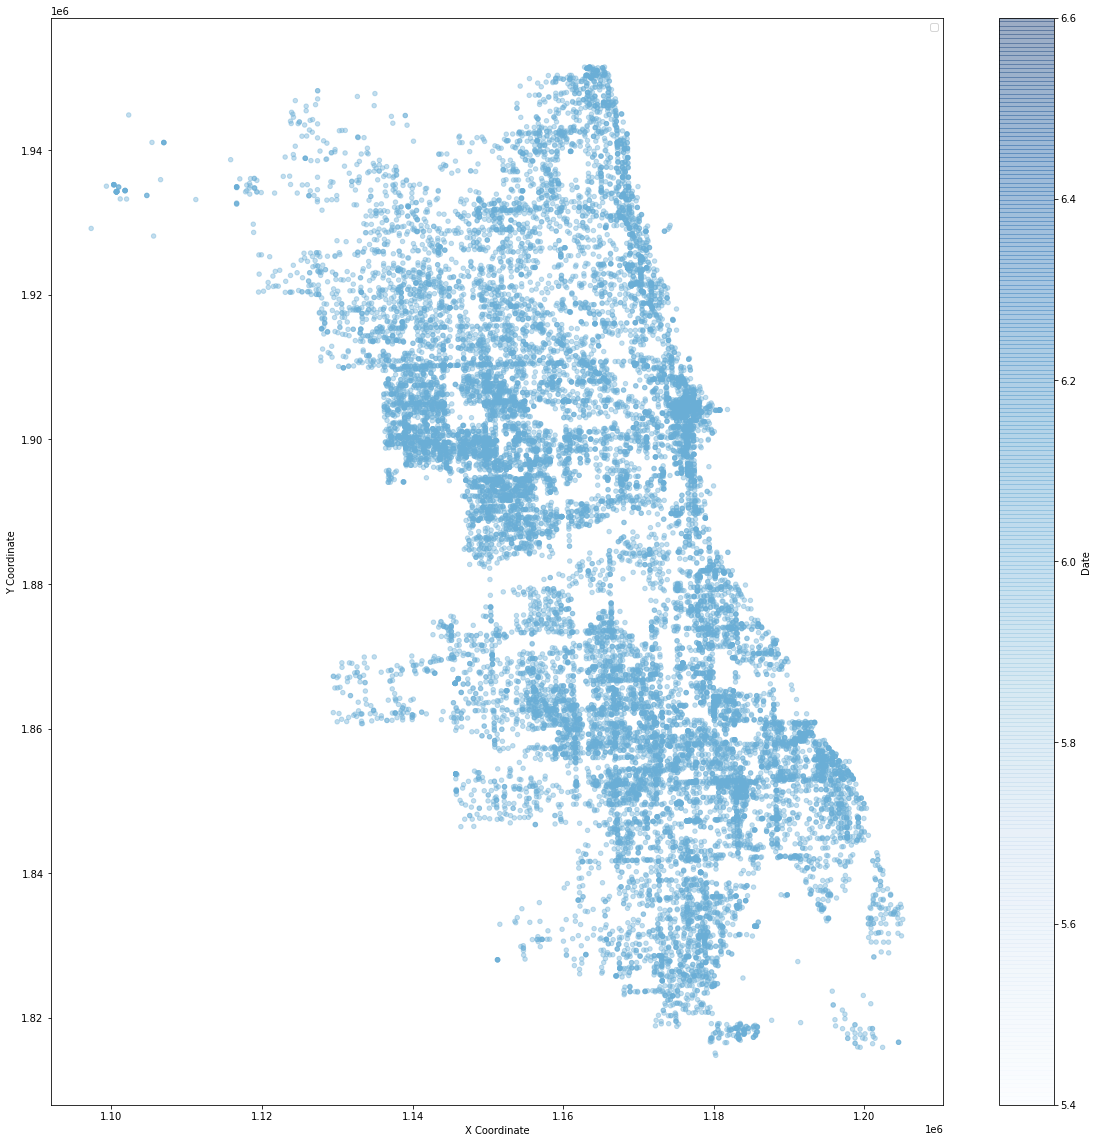

In [ ]:
codt1.plot(kind='scatter',x="X Coordinate", y="Y Coordinate", alpha=(0.4),figsize=(20,20),c="Date", cmap=plt.get_cmap("Blues"), colorbar=True, sharex=False)
plt.legend()

In [ ]:
dt2 = DataFrame.copy()
dt2['Date'] = pd.to_datetime(dt2['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.day_name()
dt2

ID Case Number  ...  Longitude                       Location
0       12157684    JD358233  ... -87.655101   (41.671461741, -87.65510074)
1       12158021    JD358730  ... -87.718974  (41.931885873, -87.718974049)
2       12158278    JD358923  ... -87.792209  (41.942567168, -87.792208683)
3       12158889    JD359283  ... -87.657619  (41.968052927, -87.657619242)
4       12159507    JD358752  ... -87.683229  (41.764151886, -87.683229302)
...          ...         ...  ...        ...                            ...
143114  11940534    JD100083  ... -87.699510  (41.779907312, -87.699510196)
143115  11938186    JD100178  ... -87.763346  (41.884839745, -87.763346491)
143116  11938654    JD100726  ... -87.655103   (41.980639456, -87.65510293)
143117  11938353    JD100252  ... -87.628291  (41.770172698, -87.628291299)
143118  11939683    JD101917  ... -87.667141  (41.912458603, -87.667140971)

[143119 rows x 22 columns]

In [ ]:
dt2["Date"].value_counts()

Sunday       21486
Saturday     21082
Friday       21019
Monday       20488
Wednesday    20324
Thursday     19541
Tuesday      19179
Name: Date, dtype: int64

In [ ]:
DataFrame.shape[0]

143119

In [ ]:
DataFrame.shape[1]

22

In [ ]:
DataFrame["Community Area"].value_counts()

25    8722
43    5353
8     5118
29    4861
23    4573
      ... 
55     331
12     326
74     291
47     225
9      144
Name: Community Area, Length: 77, dtype: int64

Community Area no. 25 appears 8722 time in the data set

In [ ]:
co=DataFrame[DataFrame["Community Area"]==25]
co.head(3)

ID Case Number  ...  Longitude                       Location
15  12159041    JD358887  ... -87.762443  (41.880279804, -87.762443285)
32  12157955    JD358579  ... -87.754482  (41.899446926, -87.754481726)
45  12163781    JD365114  ...        NaN                            NaN

[3 rows x 22 columns]

"Block" crimes distribution on "Community Area" no.25 It is seen that the top 3 streets with crime:

    052XX W MADISON ST(72) & 056XX W MADISON ST(49) & 048XX W MADISON ST(47)
    001XX N CENTRAL AVE(63) & 003XX N CENTRAL AVE(58)
    003XX S CICERO AVE(60) & 007XX S CICERO AVE(50)



In [ ]:
co["Block"].value_counts().head(10)

052XX W MADISON ST         72
001XX N CENTRAL AVE        63
055XX W WASHINGTON BLVD    61
003XX S CICERO AVE         60
003XX N CENTRAL AVE        58
002XX N PINE AVE           52
007XX S CICERO AVE         50
054XX W CHICAGO AVE        50
056XX W MADISON ST         49
048XX W MADISON ST         47
Name: Block, dtype: int64

"Primary Type" crimes distribution on "Community Area" no.25. It is seen that the top 4 crimes:

    Battery
    Theft
    Criminal Damage
    Assualt



In [ ]:
co["Primary Type"].value_counts()

BATTERY                              2227
THEFT                                1143
CRIMINAL DAMAGE                      1031
ASSAULT                               852
OTHER OFFENSE                         493
ROBBERY                               464
MOTOR VEHICLE THEFT                   460
NARCOTICS                             416
DECEPTIVE PRACTICE                    396
WEAPONS VIOLATION                     391
BURGLARY                              288
CRIMINAL TRESPASS                     129
PUBLIC PEACE VIOLATION                 78
OFFENSE INVOLVING CHILDREN             66
HOMICIDE                               52
CRIMINAL SEXUAL ASSAULT                48
PROSTITUTION                           43
SEX OFFENSE                            43
ARSON                                  36
INTERFERENCE WITH PUBLIC OFFICER       35
CRIM SEXUAL ASSAULT                     6
INTIMIDATION                            5
STALKING                                5
KIDNAPPING                        

In [ ]:
DataFrame.Description.value_counts()

SIMPLE                                           16443
DOMESTIC BATTERY SIMPLE                          14661
$500 AND UNDER                                   12008
TO PROPERTY                                       8853
TO VEHICLE                                        7918
                                                 ...  
AGGRAVATED PROTECTED EMPLOYEE - OTHER FIREARM        1
RECKLESS HOMICIDE                                    1
ATT: TRUCK, BUS, MOTOR HOME                          1
PAY TV SERVICE OFFENSES                              1
AGG PRO.EMP: OTHER FIREARM                           1
Name: Description, Length: 405, dtype: int64

In [ ]:
DataFrame["Location Description"].value_counts()

STREET                33846
RESIDENCE             24527
APARTMENT             23625
SIDEWALK               9580
SMALL RETAIL STORE     3908
                      ...  
LIQUOR STORE              1
OFFICE                    1
NURSING HOME              1
FARM                      1
CHA GROUNDS               1
Name: Location Description, Length: 158, dtype: int64

In [ ]:
DataFrame.sort_values(by=["Location Description", "Primary Type"])

ID Case Number  ...  Longitude                       Location
9158    12137897    JD334928  ... -87.625795  (41.749838557, -87.625794674)
80990   12014398    JD191715  ... -87.665588  (41.825558381, -87.665588091)
57586   12072669    JD257926  ... -87.723624  (41.870738839, -87.723624332)
59336   12037535    JD217339  ... -87.668692  (41.811344577, -87.668692272)
91613   12020821    JD198596  ... -87.614418  (41.686868162, -87.614418148)
...          ...         ...  ...        ...                            ...
141570  11942710    JD105528  ... -87.718951  (41.950755002, -87.718950965)
142182  11943767    JD105581  ... -87.581354  (41.771118229, -87.581354246)
142419  11940905    JD102490  ... -87.728718   (41.862014339, -87.72871822)
142560  11938859    JD100603  ... -87.693066  (41.854164639, -87.693066109)
142766  11942712    JD105479  ...        NaN                            NaN

[143119 rows x 22 columns]

In [ ]:
DataFrame[(DataFrame["Primary Type"]=="ASSAULT")&(DataFrame["Location Description"]=="STREET")]

ID Case Number  ...  Longitude                       Location
121     12157585    JD358094  ... -87.645330  (41.859931454, -87.645330463)
204     12158247    JD359093  ... -87.716965  (41.909989881, -87.716965071)
230     12157615    JD358188  ... -87.696037  (41.845558691, -87.696036634)
246     12158000    JD358545  ... -87.653627  (41.746403307, -87.653627313)
332     12157785    JD358406  ... -87.657418  (41.768646284, -87.657417532)
...          ...         ...  ...        ...                            ...
142694  11938825    JD101010  ... -87.653868  (41.755554244, -87.653867946)
142720  11938976    JD100188  ... -87.758264  (41.902866042, -87.758263836)
142774  11939085    JD101256  ... -87.608088  (41.780373703, -87.608087748)
143039  11938690    JD100650  ... -87.730801  (41.924437597, -87.730800673)
143105  11938571    JD100594  ... -87.620306    (41.671251141, -87.6203055)

[2418 rows x 22 columns]

No handles with labels found to put in legend.


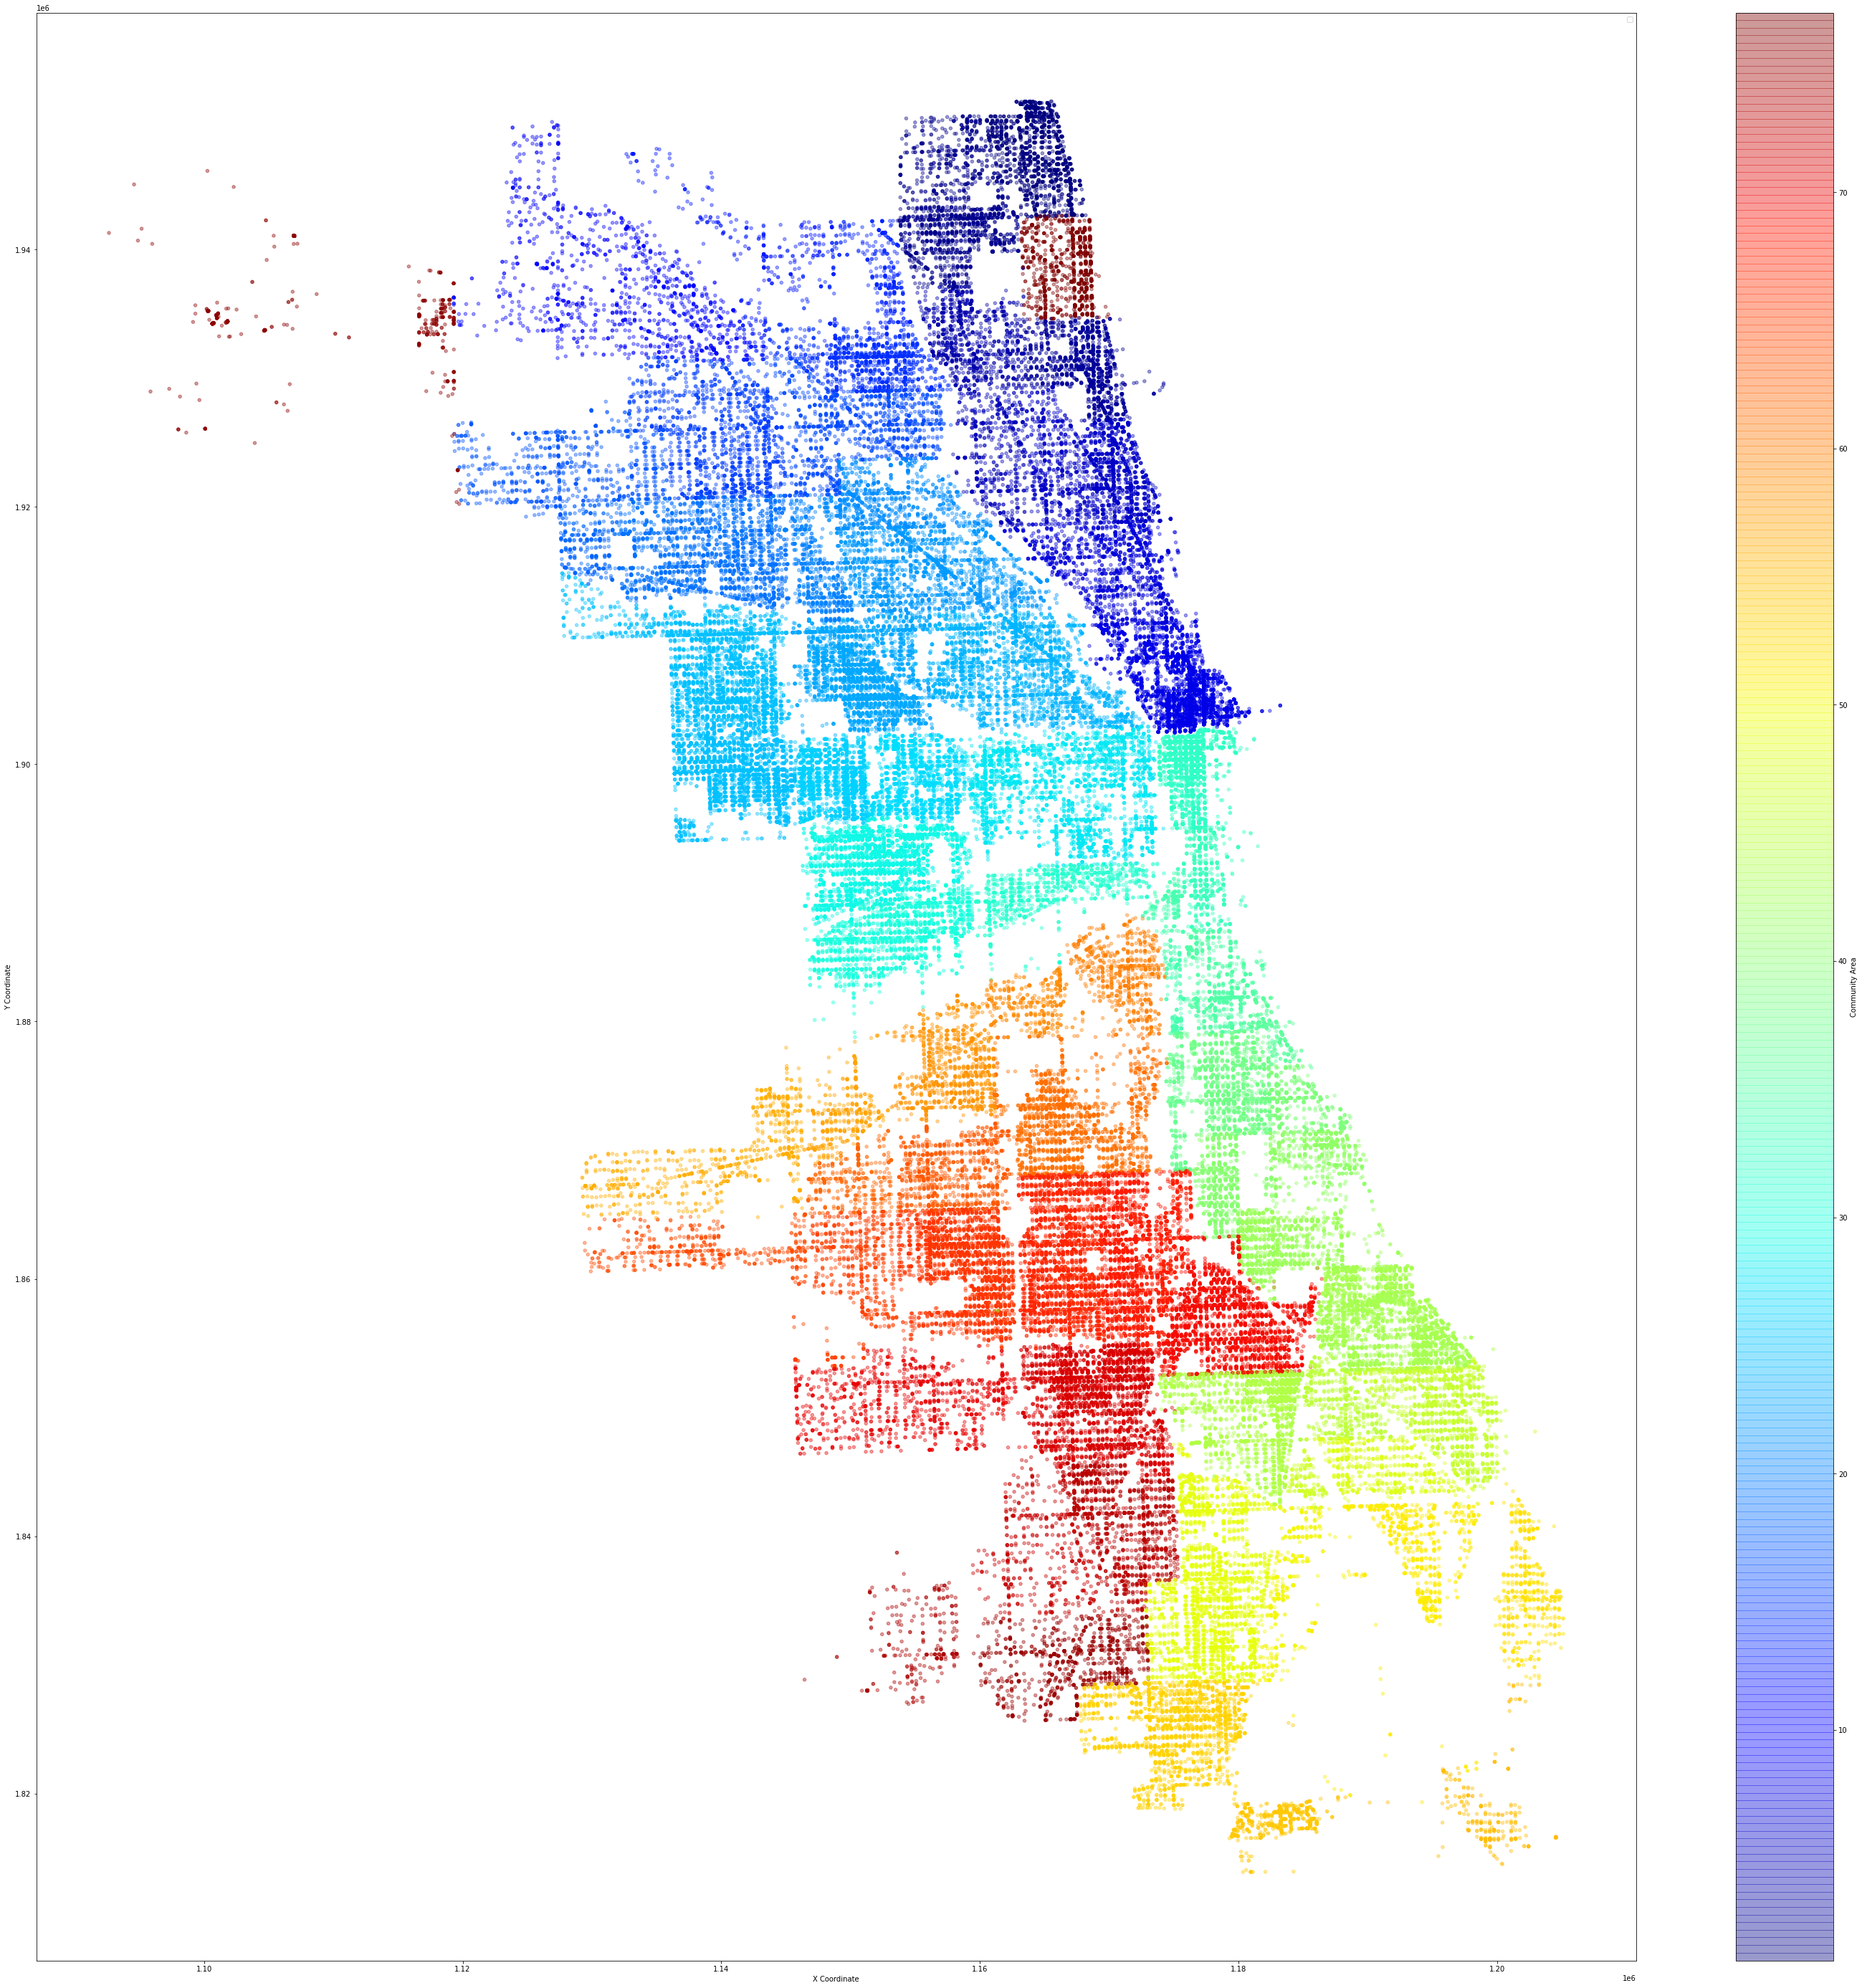

In [ ]:
DataFrame.plot(kind='scatter',x="X Coordinate", y="Y Coordinate", alpha=(0.4),figsize=(50,50),c="Community Area", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

No handles with labels found to put in legend.


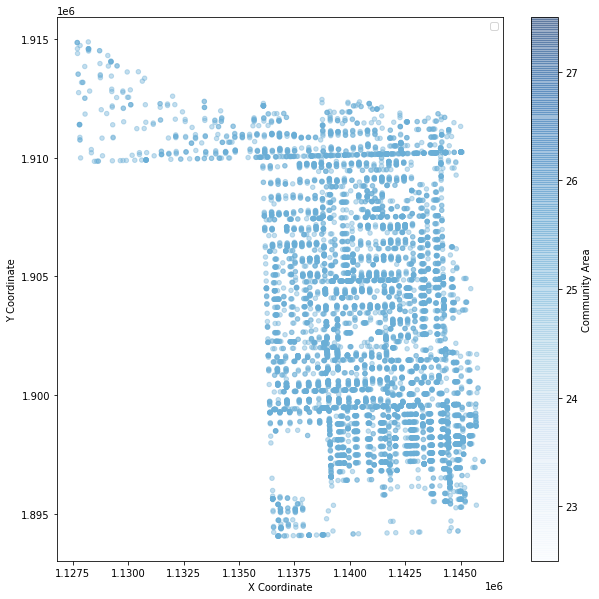

In [ ]:
co.plot(kind='scatter',x="X Coordinate", y="Y Coordinate", alpha=(0.4),figsize=(10,10),c="Community Area", cmap=plt.get_cmap("Blues"), colorbar=True, sharex=False)
plt.legend()

Plot histogram that shows per district the number of total crimes.
Next step would be to create a testing data frame , from 20% of the dataset.
Need to make sure that it would resemble  the distribution of all DataSet

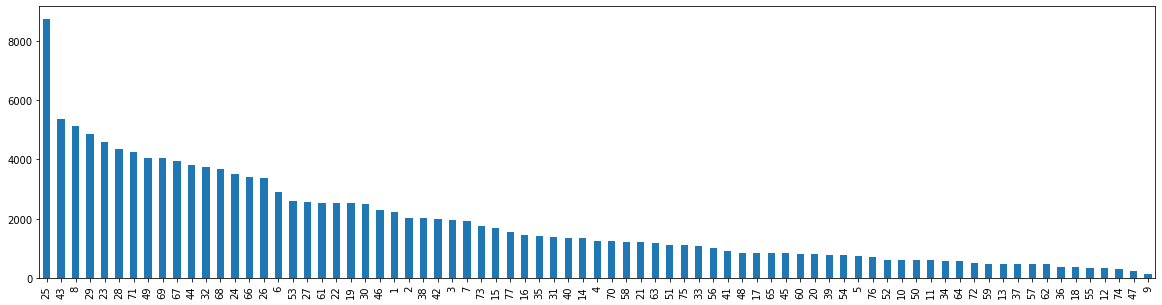

In [ ]:
DataFrame["Community Area"].value_counts().plot(kind='bar',figsize=(20,5))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
train_frame, test_frame = train_test_split(DataFrame)

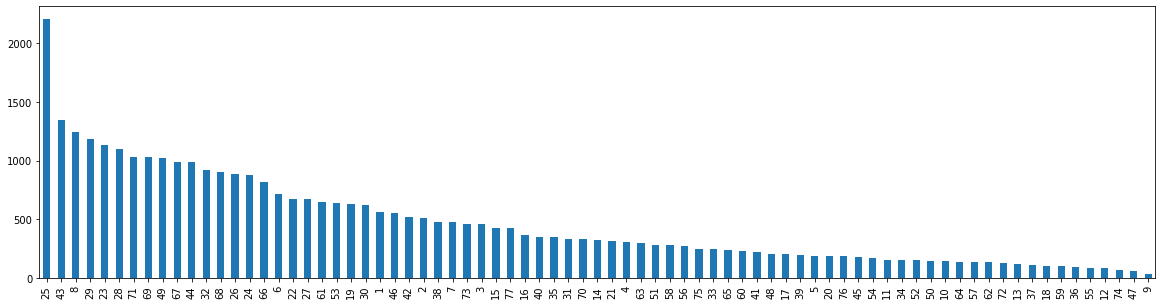

In [ ]:
test_frame["Community Area"].value_counts().plot(kind='bar',figsize=(20,5))

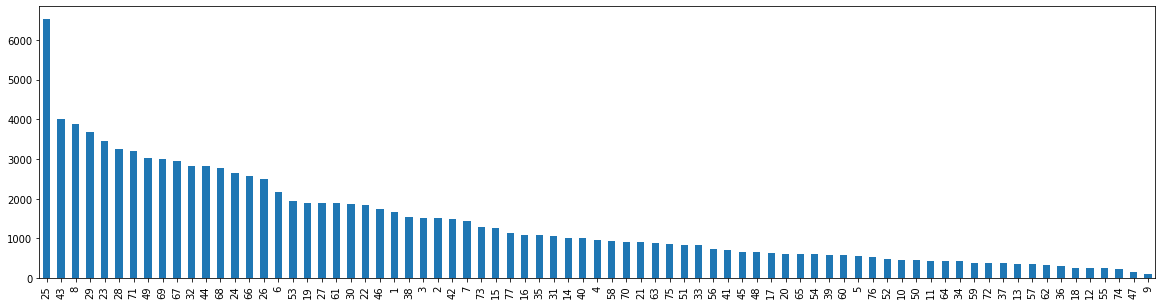

In [ ]:
train_frame["Community Area"].value_counts().plot(kind='bar',figsize=(20,5))

In [ ]:
len(train_frame)

107339

In [ ]:
len(test_frame)

35780

Convert "FBI Code" Hexa string to numeric value

In [ ]:
dt1['FBI Code'] = (DataFrame["FBI Code"]).apply(lambda x: int(x, 16))
dt1

ID Case Number  ...  Longitude                       Location
0       12157684    JD358233  ... -87.655101   (41.671461741, -87.65510074)
1       12158021    JD358730  ... -87.718974  (41.931885873, -87.718974049)
2       12158278    JD358923  ... -87.792209  (41.942567168, -87.792208683)
3       12158889    JD359283  ... -87.657619  (41.968052927, -87.657619242)
4       12159507    JD358752  ... -87.683229  (41.764151886, -87.683229302)
...          ...         ...  ...        ...                            ...
143114  11940534    JD100083  ... -87.699510  (41.779907312, -87.699510196)
143115  11938186    JD100178  ... -87.763346  (41.884839745, -87.763346491)
143116  11938654    JD100726  ... -87.655103   (41.980639456, -87.65510293)
143117  11938353    JD100252  ... -87.628291  (41.770172698, -87.628291299)
143118  11939683    JD101917  ... -87.667141  (41.912458603, -87.667140971)

[143119 rows x 22 columns]

In [ ]:
from sklearn import linear_model
from sklearn.utils import shuffle

In [ ]:
dt0=dt0[["Date","Arrest","Domestic","Ward","Community Area","FBI Code"]]
dt0